In [7]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

from sklearn.metrics import auc, roc_curve

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, _tree

warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


In [8]:
data=pd.read_csv("HR-Employee-Attrition.csv")

le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['Gender'] = le.fit_transform(data['Gender'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])


In [9]:
y=data['Attrition']
X=data.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [10]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=0, max_depth=5, criterion='entropy')
}

In [11]:
results = []


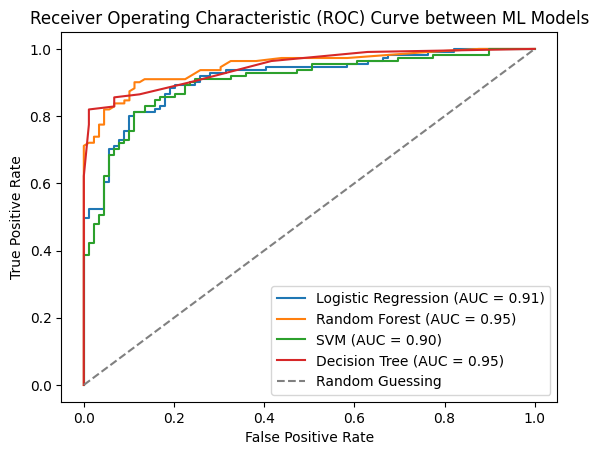

            Model Name  Accuracy  Precision    Recall  F1 Score  Support  \
0  Logistic Regression     0.830   0.828070  0.831258  0.828905    200.0   
1        Random Forest     0.870   0.868682  0.872862  0.869360    200.0   
2                  SVM     0.830   0.831949  0.835712  0.829728    200.0   
3        Decision Tree     0.895   0.901973  0.904292  0.894976    200.0   

       Confusion Matrix  Avg ROC AUC (CV)  
0  [[75, 14], [20, 91]]          0.931499  
1   [[80, 9], [17, 94]]          0.963149  
2  [[79, 10], [24, 87]]          0.925319  
3   [[88, 1], [20, 91]]          0.934679  


In [12]:
for model_name, model in models.items():
        model.fit(X_train, y_train)

        # Cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
        avg_roc_auc = np.mean(cv_scores)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

        precision = classification_report_dict['macro avg']['precision']
        recall = classification_report_dict['macro avg']['recall']
        f1 = classification_report_dict['macro avg']['f1-score']
        support = classification_report_dict['macro avg']['support']
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

        results.append({
            'Model Name': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Support': support,
            'Confusion Matrix': confusion_matrix_data,
            'Avg ROC AUC (CV)': avg_roc_auc
        })
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve between ML Models')
plt.legend()
plt.show()
results_df = pd.DataFrame(results)
print(results_df.head())